In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the dataset -> data matrix

In [106]:
# n = 5
# m = 2
# data = np.random.rand(n, m)
# data

mean = [3, 4]
AAT = [[1,3],[3,12]]
size = (3000)
data = np.random.default_rng().multivariate_normal(mean, AAT, size=size)

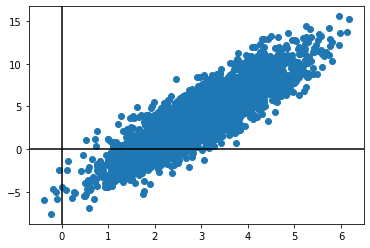

In [107]:
plt.axhline(color='black')
plt.axvline(color='black')
plt.scatter(x = data[:, 0], y = data[:, 1])

## Preprocessing

In [108]:
# Shift coordinate -> Normalize 
mean = data.mean(axis = 0)
data = data - mean
data

array([[ 0.59751797,  3.5186784 ],
       [ 0.2371032 , -0.13606858],
       [-0.09131263, -1.97504854],
       ...,
       [ 1.07725868,  6.0759324 ],
       [ 0.20981649, -0.42213931],
       [ 2.22555425,  3.22059878]])

In [109]:
#norm_data = data / (data ** 2).sum(axis = 1).reshape((-1, 1))
#plt.scatter(x = norm_data[:, 0], y = norm_data[:, 1])
#data = norm_data

[ 7.49696601e-15 -7.28350713e-15]


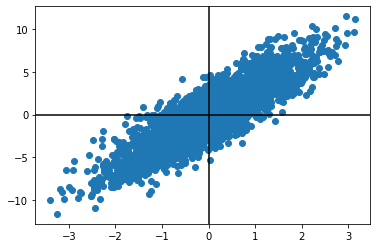

In [110]:
plt.axhline(color='black')
plt.axvline(color='black')
plt.scatter(x = data[:, 0], y = data[:, 1])
print(data.mean(axis=  0))

## Calculate the SVD:
$$
A * A^T = U \Sigma V^T V \Sigma^T U^T = U * \Sigma * \Sigma^T * U^T
$$
$$
A^T * A = V \Sigma^T U^T * U \Sigma V^T = V \Sigma^T * \Sigma * V^T
$$

Thus: Eigenvalues of $A^T * A$ are $\sigma^2$, the eigen vectors are the columns of V.

Eigenvalues of $A * A^T$ are also $\sigma^2$, the eigenvectors are the columns of U

In [111]:
# Calculate the SVD
u, sigma, v = np.linalg.svd(data, full_matrices=False)
print(u.shape)
#sigma = np.diag(sigma)
print(sigma.shape)
print(v.shape)
#u, sigma, v

(3000, 2)
(2,)
(2, 2)


# Principal components

In [112]:
# Each column of V is an eigenvector  of A.T @ A
print("Eigen values, " ,sigma ** 2)
print("Eigen vectors (rows)", v.T)

Eigen values,  [38964.00858998   700.55030911]
Eigen vectors (rows) [[ 0.24954037  0.9683644 ]
 [ 0.9683644  -0.24954037]]


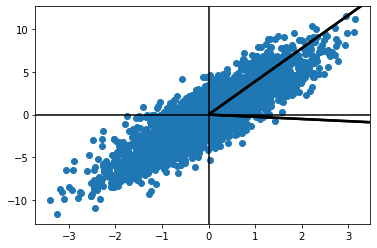

In [113]:
plt.axhline(color='black')
plt.axvline(color='black')
plt.scatter(x = data[:, 0], y = data[:, 1])
for a in v.T:
    plt.quiver([0,0], [0,0], a[0], a[1],angles='xy',scale=1)

In [114]:
def scatter_with_axes(data):
    plt.axhline(color='black')
    plt.axvline(color='black')
    plt.scatter(x = data[:, 0], y = data[:, 1])

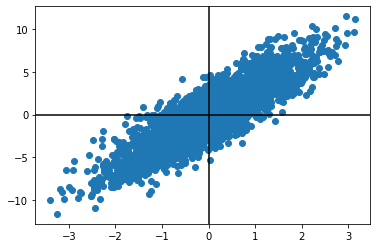

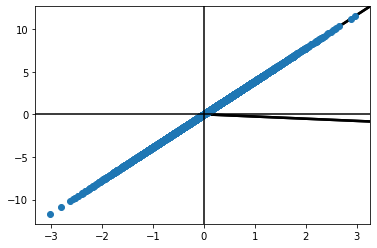

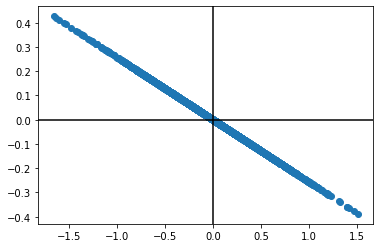

In [115]:
# sub is a vector
def project(x,sub):
    tmp = sub.reshape((-1))
    return (x @ sub / tmp.dot(tmp)) * tmp
    

k = 1
u = v[:, 0:1]
u2 = v[:, 1:2]

x = project(data, u)
x1 = project(data, u2)

scatter_with_axes(data)


plt.figure()
for a in v.T:
    plt.quiver([0,0], [0,0], a[0], a[1],angles='xy',scale=1)
scatter_with_axes(x)

plt.figure()
scatter_with_axes(x1)


In [116]:
u = v.T

In [117]:
v

array([[ 0.24954037,  0.9683644 ],
       [ 0.9683644 , -0.24954037]])

In [118]:
M = 3000
data.shape

(3000, 2)

In [119]:
u.T.shape

(2, 2)

In [120]:
data @ u.T 

array([[ 3.55646774, -0.29943718],
       [-0.07259715,  0.2635569 ],
       [-1.93535287,  0.40443045],
       ...,
       [ 6.15253614, -0.47301147],
       [-0.356427  ,  0.30851962],
       [ 3.67407882,  1.35147809]])

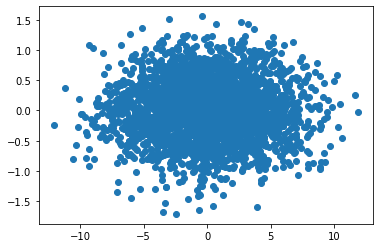

In [121]:
## New coordinate
new = data @ u.T
plt.scatter(x=new[:, 0], y=new[:, 1])

#for a in v.T:
#    plt.quiver([0,0], [0,0], a[0], a[1],angles='xy')

In [122]:
# Pick k: (k = 1)

tu = u[:1]
new = data @ tu.T


Threshold > 0.9 or 0.95

In [123]:
sigma, v.T

(array([197.39303075,  26.46791093]),
 array([[ 0.24954037,  0.9683644 ],
        [ 0.9683644 , -0.24954037]]))

In [124]:
threshold = 0.9 * np.sum(sigma)
threshold

201.47484751688646

# Test: Eigenface

In [125]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [126]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)


In [127]:

# credits: geeksforgeeks

def plot_gallery(images, titles, h, w, n_row = 3, n_col = 4):
    plt.figure(figsize =(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray)
        if titles is not None:
            plt.title(titles[i], size = 12)
        plt.xticks(())
        plt.yticks(())
 
# Generate true labels above the images
def true_title(Y, target_names, i):
    true_name = target_names[Y[i]].rsplit(' ', 1)[-1]
    return 'true label:   % s' % (true_name)


In [128]:
n_samples, h, w = lfw_people.images.shape
print(n_samples, h, w)
X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

1288 50 37
Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


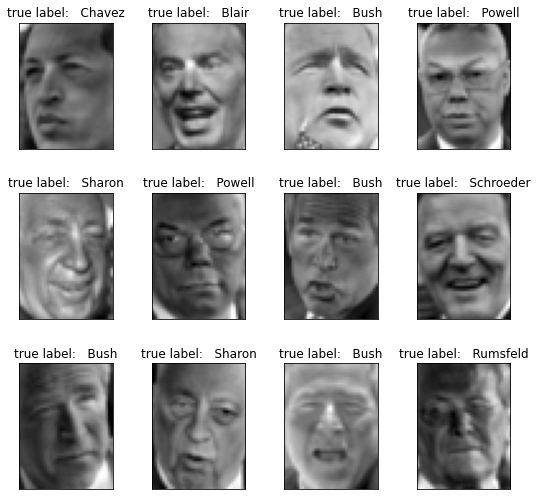

In [138]:
# some values from X
phi = X.T - X.T.mean(axis = 1).reshape((-1, 1))
phi.shape
 
true_titles = [true_title(y, target_names, i)
                     for i in range(y.shape[0])]
plot_gallery(phi.T, true_titles, h, w)

Get the eigenvectors of $A * A^T$

In [139]:
eigenval, eigenvec = np.linalg.eig(phi @ phi.T)

In [140]:
eigenvec.shape, eigenval

((1850, 1850),
 array([ 6.2798835e+08,  5.0244378e+08,  2.4240176e+08, ...,
        -4.3822846e-01,  3.8661766e-01, -1.1104057e-01], dtype=float32))

In [145]:

idx = np.flip(np.argsort(eigenval))
sorted_eigenval = eigenval[idx]
sorted_eigenvec = eigenvec[:, idx]
sorted_eigenval, sorted_eigenvec

k = 150
trimmed_eigenval = sorted_eigenval[:k]
trimmed_eigenvec = sorted_eigenvec[:,:k]
trimmed_eigenval.shape, trimmed_eigenvec.shape

((150,), (1850, 150))

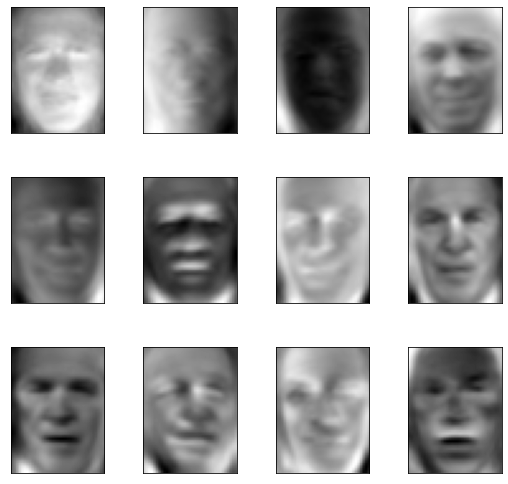

In [147]:
plot_gallery(trimmed_eigenvec.T, None, h, w)


In [134]:
n_components = 150
pca = PCA(n_components = n_components, svd_solver ='randomized',
          whiten = True).fit(X)
eigenfaces = pca.components_.reshape((n_components, h, w))
X_pca = pca.transform(X)

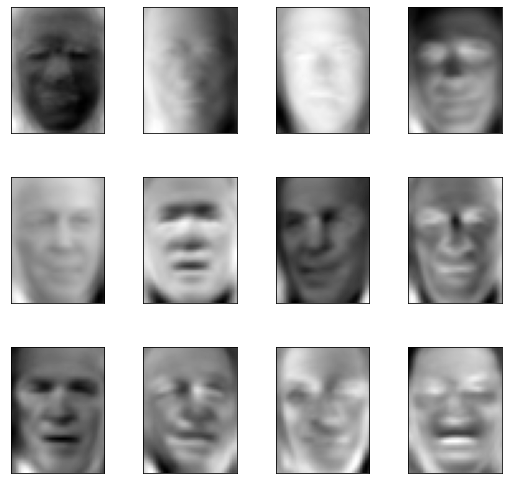

In [135]:
plot_gallery(eigenfaces, None, h, w)